# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  ![image.png](attachment:image.png)
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

1. veri kesiti
Train R2 Score: 0.1947 MSE: 0.0496
Test R2 Score:    0.2054 MSE: 0.0497

2. veri kesiti
Train R2 Score: 0.2010 MSE: 0.0501
Test R2 Score:    0.1884 MSE: 0.0474

3. veri kesiti
Train R2 Score: 0.2009 MSE: 0.0496
Test R2 Score:    0.1892 MSE: 0.0494

4. veri kesiti
Train R2 Score: 0.1980 MSE: 0.0490
Test R2 Score:    0.2018 MSE: 0.0515

5. veri kesiti
Train R2 Score: 0.2004 MSE: 0.0493
Test R2 Score:    0.1913 MSE: 0.0506

-----------------------------------------------------------------------
1. veri kesiti
Train R2 Score: 0.1608 MSE: 0.0517
Test R2 Score:    0.1664 MSE: 0.0521

2. veri kesiti
Train R2 Score: 0.1633 MSE: 0.0524
Test R2 Score:    0.1581 MSE: 0.0492

3. veri kesiti
Train R2 Score: 0.1631 MSE: 0.0519
Test R2 Score:    0.1595 MSE: 0.0512

4. veri kesiti
Train R2 Score: 0.1618 MSE: 0.0512
Test R2 Score:    0.1647 MSE: 0.0539

5. veri kesiti
Train R2 Score: 0.1632 MSE: 0.0516
Test R2 Score:    0.1583 MSE: 0.0527



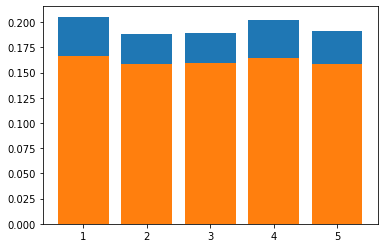

In [1]:
import pandas as pd
import random
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import LinearSVC

dataset=pd.read_csv('insan_kaynaklari.csv')

dataset=pd.get_dummies(dataset,columns=["calistigi_bolum","maas_derecesi"])

newset = dataset[["gerceklestirdigi_proje_sayisi",
                  "aylik_ort_calisma_saati",
                  "sirkette_calistigi_yil_sayisi"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(newset)
normalized=pd.DataFrame(x_scaled) #gerekli sütunlar normalize edildi
set1=dataset[dataset.iloc[:,0:2].columns]
set2=dataset[dataset.iloc[:,5:].columns]

set3=pd.concat([set1,normalized],axis=1,join='inner')
result = pd.concat([set3,set2], axis=1, join='inner')
result.rename(columns={ 0: "gerceklestirdigi_proje_sayisi" ,
                       1 :"aylik_ort_calisma_saati",
                       2 :"sirkette_calistigi_yil_sayisi"},inplace=True)


x=result[result.iloc[:,1:].columns].to_numpy()
y=result[["memnuniyet_duzeyi"]].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
def linearKfoldFunction(x):
  scores=[]
  LinearRegressionKfold = LinearRegression()

  iter = 1
  cv = KFold(n_splits=5,shuffle=True, random_state=50)
  for train_index, test_index in cv.split(x):
      x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
      LinearRegressionKfold.fit(x_train, y_train)

      y_train_predict = LinearRegressionKfold.predict(x_train)
      y_test_predict = LinearRegressionKfold.predict(x_test)

      r2_train = metrics.r2_score(y_train, y_train_predict)
      r2_test = metrics.r2_score(y_test, y_test_predict)

      mse_train = metrics.mean_squared_error(y_train, y_train_predict)
      mse_test = metrics.mean_squared_error(y_test, y_test_predict)


      print(f"{iter}. veri kesiti")
      print(f"Train R2 Score: {r2_train:.4f} MSE: { mse_train:.4f}")
      print(f"Test R2 Score: {r2_test :9.4f} MSE: {mse_test:.4f}\n")
      iter += 1
      scores.append(LinearRegressionKfold.score(x_test, y_test))
  plt.figure(0)
  plt.bar(range(1,len(scores)+1),scores)



linearKfoldFunction(x)
lrs=LinearRegression()
rfe = RFE(lrs, 2)
rfe = rfe.fit(x,y.ravel())
selectedColumns=["aldigi_degerlendirme_puani",
                 "sirketten_ayrildi"]

x1=result[selectedColumns].to_numpy()
y=result[["memnuniyet_duzeyi"]].to_numpy()

x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)


lr_model=LinearRegression()
lr_model.fit(x_train,y_train)



print("-----------------------------------------------------------------------")

linearKfoldFunction(x1)


Calıştığı bölüm ve Maaş derecesi sütunlarına one-hot-coding işlemi uygulanırken,değer aralığı kategorik olmayan sütunlarına normalizasyon uygulanmıştır, diğer sütunların değer aralıkları baz alındığında normalizasyon işlemi yapılması gerek görülmemiştir.K-Fold içinde geçen K değeri veri setini kaç kere iterasyondan geçirerek train ve test olarak farklı kesitler için bölmemiz gerektiğini söylediğinden veri setini ne kadar bölersek o kadar farklı sonuçlar bularak bizim için en optimal iterasyonu bulmamız o kadar kolaylaştırmıştır. Veri setinde bulunan sütunları daraltarak daha az öznitelik kullanarak K-Fold cross val uygulaması yapılınca değerlerin daha düşük olduğu görülmüştür, sistem ne kadar çok sütun varsa o kadar yüksek sonuçlar vermektedir. 2 farklı sütun sayısına göre r2 train ve test scorelarının çarpımlarını gösteren Bar chart çizilmiştir.

Mean Absolute Error: 0.11790098355598107
Mean Squared Error: 0.028748548180894336
Root Mean Squared Error: 0.16955396834310407
Score: 0.5404415748214948
------------------------------------------------------------------
Mean Absolute Error: 0.11672811489177487
Mean Squared Error: 0.02700962651151539
Root Mean Squared Error: 0.16434605718274897
Score: 0.5377011041058334
------------------------------------------------------------------
Mean Absolute Error: 0.11457434482323231
Mean Squared Error: 0.027310302826858604
Root Mean Squared Error: 0.16525829124996605
Score: 0.5513101900809747
------------------------------------------------------------------
Mean Absolute Error: 0.11997196607975358
Mean Squared Error: 0.028793513680426205
Root Mean Squared Error: 0.16968651590632122
Score: 0.553635181504327
------------------------------------------------------------------
Mean Absolute Error: 0.11845684287064498
Mean Squared Error: 0.028373107975311833
Root Mean Squared Error: 0.1684431891627

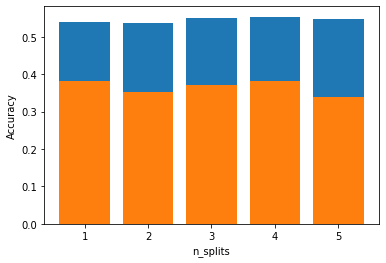

In [2]:
from sklearn.ensemble import RandomForestRegressor
def randomForestKFold(x):
  sc = []
  RFKfold = RandomForestRegressor()

  iter = 1
  cv = KFold(n_splits=5,shuffle=True, random_state=50)
  for train_index, test_index in cv.split(x):
      x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
      RFKfold.fit(x_train, y_train.ravel())
      y_pred = RFKfold.predict(x_test)
      print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
      print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
      print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
      print('Score:',RFKfold.score(x_test, y_test))
      print("------------------------------------------------------------------")
      iter += 1
      sc.append(RFKfold.score(x_test, y_test))
  plt.figure(0)
  plt.xlabel('n_splits')
  plt.ylabel('Accuracy')
  plt.bar(range(1,len(sc)+1),sc)

randomForestKFold(x)

print("----------------------ALDİGİ DEGERLENDİRME PUANI VE GERCEKLESTİRDİGİ PROJE SAYISININ BASARI ORANINA ETKİSİ---------------")
s=result[["aldigi_degerlendirme_puani","gerceklestirdigi_proje_sayisi"]].to_numpy()
randomForestKFold(s)

LinearRegresyon işlemi uygulanmış fakat veriyi analiz edemediği düşünülmüştür başarı oranları çok düşük olduğundan farklı bir yaklaşım yapılmıştır.

0.5327277463661839
Mean Absolute Error: 0.11946675699517148
Mean Squared Error: 0.028956411709497094
Root Mean Squared Error: 0.17016583590573373


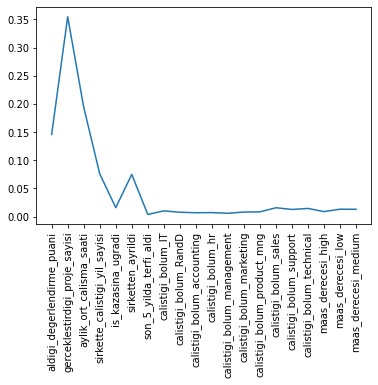

In [3]:
from sklearn.ensemble import RandomForestRegressor

columnfeaturesName=result.iloc[:,1:].columns
x=result[result.iloc[:,1:].columns].to_numpy()
y=result["memnuniyet_duzeyi"].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
rf = RandomForestRegressor(n_estimators=250)
rf.fit(x_train, y_train.ravel())
print(rf.score(x_test, y_test))
y_pred = rf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(1)
plt.xticks(rotation=90)
plt.plot(columnfeaturesName,rf.feature_importances_)

Memnuniyet düzeyinin tahminlenmesi işleminde hangi öznitelik daha etkili sorusuna yanıt vermek için random forest regressor tarafından bu işlem yapılmıştır. 

### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

--------------Classification Report--------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2299
           1       0.59      0.33      0.42       701

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.77      0.79      0.77      3000

1. veri kesiti
Train Verileri İçin f1 score: 0.6440073043759271
Test Verileri için f1 score: 0.640089857927918
Score: 0.7793333333333333
2. veri kesiti
Train Verileri İçin f1 score: 0.6567393778166414
Test Verileri için f1 score: 0.6484006919474381
Score: 0.7916666666666666
3. veri kesiti
Train Verileri İçin f1 score: 0.6594705020015952
Test Verileri için f1 score: 0.6673741217798594
Score: 0.798
4. veri kesiti
Train Verileri İçin f1 score: 0.6647824413202886
Test Verileri için f1 score: 0.6645590355654527
Score: 0.7903333333333333
5. veri kesiti
Train Verileri İçin f1 score: 0.6533297594133273
Test Verileri için f1

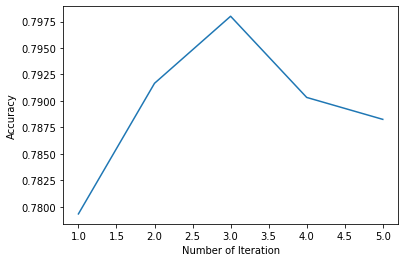

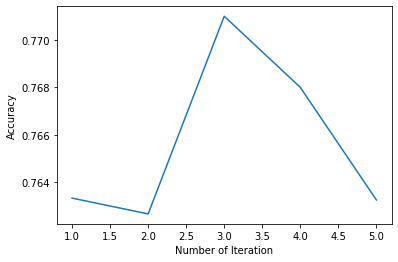

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
frame=result.drop(['sirketten_ayrildi'],axis=1).values
x1=frame
y1=result["sirketten_ayrildi"].values
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

clf = LogisticRegression(random_state=0).fit(x1,y1)
y_predict=clf.predict(x_test)
clf.score(x1,y1)

print("--------------Classification Report--------------")
print(classification_report(y_test, y_predict))


LogisticRegressionKFold = LogisticRegression(solver='lbfgs', max_iter=10000)
sps=[]
iter = 1
cv = KFold(n_splits=5, random_state=50,shuffle=True)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x1[train_index], x1[test_index], y1[train_index], y1[test_index]
    LogisticRegressionKFold.fit(x_train, y_train)
    y_train_predict = LogisticRegressionKFold.predict(x_train)
    y_test_predict = LogisticRegressionKFold.predict(x_test)
    print(f"{iter}. veri kesiti")
    print("Train Verileri İçin f1 score:",f1_score(y_train, y_train_predict, average='macro'))
    print("Test Verileri için f1 score:",f1_score(y_test,y_test_predict, average='macro'))
    print("Score:",LogisticRegressionKFold.score(x_test, y_test))
    iter+=1
    sps.append(LogisticRegressionKFold.score(x_test, y_test))
plt.figure(0)
plt.xlabel('Number of Iteration')
plt.ylabel('Accuracy')
plt.plot(range(1,len(sps)+1),sps)



lfs=LogisticRegression()
rfe = RFE(lfs, 5)
rfe = rfe.fit(x1,y1)
print(rfe.support_)
rfeColumns=["memnuniyet_duzeyi",
"sirkette_calistigi_yil_sayisi",
"is_kazasina_ugradi",		
"son_5_yilda_terfi_aldi",
"maas_derecesi_high"]

x2=result[["memnuniyet_duzeyi",
"sirkette_calistigi_yil_sayisi",
"is_kazasina_ugradi",		
"son_5_yilda_terfi_aldi",
"maas_derecesi_high"]].values

y2=result["sirketten_ayrildi"].values

x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)


lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)



print("-----------------------------------------------------------------------")
LogisticRegressionKFold = LogisticRegression(solver='lbfgs', max_iter=10000)
sps=[]
iter = 1
cv = KFold(n_splits=5, random_state=50,shuffle=True)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x2[train_index], x2[test_index], y2[train_index], y2[test_index]
    LogisticRegressionKFold.fit(x_train, y_train)
    y_train_predict = LogisticRegressionKFold.predict(x_train)
    y_test_predict = LogisticRegressionKFold.predict(x_test)
    print(f"{iter}. veri kesiti")
    print("Train Verileri İçin f1 score:",f1_score(y_train, y_train_predict, average='macro'))
    print("Test Verileri için f1 score:",f1_score(y_test,y_test_predict, average='macro'))
    print("Score:",LogisticRegressionKFold.score(x_test, y_test))
    iter+=1
    sps.append(LogisticRegressionKFold.score(x_test, y_test))
plt.figure(1)
plt.xlabel('Number of Iteration')
plt.ylabel('Accuracy')
plt.plot(range(1,len(sps)+1),sps)




işlemin sonucu kategorik davranan bir regresyon olduğundan lojitik regresyon işlemi ilk olarak denenmiştir, daha sonra rfe kullanılarak feature selection işlemi uygulanmıştır K-fold işlemi hem feature_selection ile selected_feature kolonlar ile hem de default veri setinin hepsi ile uygulanmıştır, arasındaki fark anlaşılması adına yapılan bu işlemler grafik olarak çizdirilmiştir. Bu sayede en iyi iterasyonu alarak daha sağlıklı sonuçlar elde edebileceğimiz düşünülmüştür.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.943573278464432
Mean Absolute Error: 0.026552000000000003
Mean Squared Error: 0.010104138666666667
Root Mean Squared Error: 0.10051934473854605


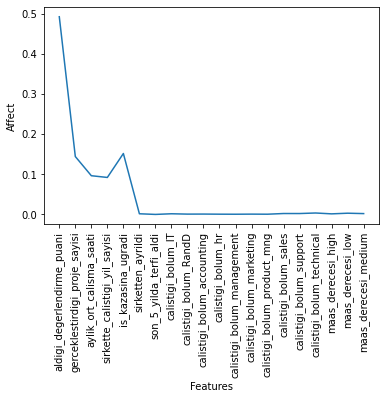

In [7]:
from sklearn.ensemble import RandomForestRegressor

frame=result.drop(['sirketten_ayrildi'],axis=1).values
x1=frame
y1=result["sirketten_ayrildi"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

rf = RandomForestRegressor(n_estimators=250)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
y_pred = rf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(1)
plt.xlabel('Features')
plt.ylabel('Affect')
plt.xticks(rotation=90)
plt.plot(columnfeaturesName,rf.feature_importances_)


Random forest Regressor kullanılarak feature selection işleminde hangi özniteliğin diğerinden daha önemli olduğunu göstermek adına bir grafik çizilmiştir.

Mean Absolute Error: 0.028963333333333334
Mean Squared Error: 0.012200499999999998
Root Mean Squared Error: 0.11045587354233363
Score: 0.933736950093537
------------------------------------------------------------------
Mean Absolute Error: 0.027046666666666667
Mean Squared Error: 0.009872800000000001
Root Mean Squared Error: 0.09936196455384727
Score: 0.9437936941290778
------------------------------------------------------------------
Mean Absolute Error: 0.022306666666666673
Mean Squared Error: 0.007090266666666666
Root Mean Squared Error: 0.08420372121626613
Score: 0.9609417453443712
------------------------------------------------------------------
Mean Absolute Error: 0.029963333333333335
Mean Squared Error: 0.014287366666666669
Root Mean Squared Error: 0.11952977313902452
Score: 0.9221125260763063
------------------------------------------------------------------
Mean Absolute Error: 0.026978992997665888
Mean Squared Error: 0.011164488162720905
Root Mean Squared Error: 0.1056621

<BarContainer object of 5 artists>

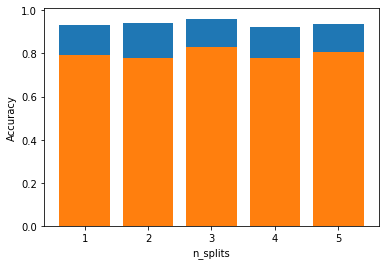

In [8]:
frame=result.drop(['sirketten_ayrildi'],axis=1).values
x1=frame
y1=result["sirketten_ayrildi"].values
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
sts = []
RFKfold = RandomForestRegressor()

iter = 1
cv = KFold(n_splits=5,shuffle=True, random_state=50)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x1[train_index], x1[test_index], y1[train_index], y1[test_index]
    RFKfold.fit(x_train, y_train)
    y_pred = RFKfold.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Score:',RFKfold.score(x_test, y_test))
    print("------------------------------------------------------------------")
    iter += 1
    sts.append(RFKfold.score(x_test, y_test))
plt.figure(0)
plt.xlabel('n_splits')
plt.ylabel('Accuracy')
plt.bar(range(1,len(sts)+1),sts)



print("----------------------RFE ILE SECILEN EN ETKILI 5 OZNITELIGE GORE BASARI ORANI HESAPLAMASI---------------")

x1=result[["memnuniyet_duzeyi",
"sirkette_calistigi_yil_sayisi",
"is_kazasina_ugradi",		
"son_5_yilda_terfi_aldi",
"maas_derecesi_high"]].values

y1=result["sirketten_ayrildi"].values

sts = []
RFKfold = RandomForestRegressor()

iter = 1
cv = KFold(n_splits=5,shuffle=True, random_state=50)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x1[train_index], x1[test_index], y1[train_index], y1[test_index]
    RFKfold.fit(x_train, y_train)
    y_pred = RFKfold.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Score:',RFKfold.score(x_test, y_test))
    print("------------------------------------------------------------------")
    iter += 1
    sts.append(RFKfold.score(x_test, y_test))
plt.figure(0)
plt.xlabel('n_splits')
plt.ylabel('Accuracy')
plt.bar(range(1,len(sts)+1),sts)


Lojistik regresyonla karşılaştırılması ve başarı oranlarının ve metriks değerlerinin incelenebilmesi adına bu işlem yapılmıştır en etkili öznitelikler ayıklandığı için onları denemek adına o öznitelikler ile fit k-fold işlemleri yapılmış ve karşılaştırması yapılmıştır, turuncu renkli olanlar feature selection yapılan, mavi renkli olanlar ise yapılmayan iterasyonlara ait başarı değerlerini simgelemektedir.

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


frame=result.drop(["maas_derecesi_low","maas_derecesi_medium","maas_derecesi_high"],axis=1).values
x1=frame
y1=result[["maas_derecesi_low","maas_derecesi_medium","maas_derecesi_high"]].values

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
classifier=RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [47,48,49,50],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print("Best parameters found:")  
print() 
print(CV_rfc.best_params_) 

Accuracy for Random Forest on CV data:  0.551
Best parameters found:

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Gridsearch işlemiyle optimum parametreler aranmıştır fakat CPU'yu aşırı yormasından kaynaklı daha kapsamlı parametreler kullanıldığında işlem çok uzun sürmüştür, bu yüzden daha hızlı search yapılabilecek parametreler verilmiş sonucu gösterilmiştir(işlemin yapılma prensibini işlenmiştir) daha sonrasında çıkan değerler optimum olmadığı için başarı oranı çok düşük gözükmemesi adına max_depth değeri manuel olarak değiştirilmiştir.

In [54]:
classiffier=RandomForestClassifier(random_state=42, max_features='auto',min_samples_split=2, n_estimators= 200, max_depth=50, criterion='gini')
classiffier.fit(x_train, y_train)
pred=classiffier.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))


Accuracy for Random Forest on CV data:  0.5446666666666666


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

frame=result.drop(["maas_derecesi_low","maas_derecesi_medium","maas_derecesi_high"],axis=1).values
x1=frame
y1=result[["maas_derecesi_low","maas_derecesi_medium","maas_derecesi_high"]].values
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
classiffier=KNeighborsClassifier()
classiffier.fit(x_train, y_train)
pred=classiffier.predict(x_test)
print("Accuracy for KnnClassifier on CV data: ",accuracy_score(y_test,pred))

range = list(range(1, 70))
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=range, weights=weights)

CV_dtc = GridSearchCV(estimator=KNN, param_grid=param_grid, cv= 5)
CV_dtc.fit(x_train, y_train)
print("Best parameters found:")  
print() 
print(CV_dtc.best_params_) 

Accuracy for KnnClassifier on CV data:  0.4703333333333333
Best parameters found:

{'n_neighbors': 1, 'weights': 'uniform'}


KNN için gridsearch uygulanmış öncesinde default parametreleri ile setimiz fit edilmiş ve başarı oranı gösterilmiştir, gösterilme sebebi farkının anlaşılması yani yapmış olduğumuz gridsearch işleminin işe yarayıp yaramadığının kontrolü edilmiştir.

In [10]:
x1=frame
y1=result[["maas_derecesi_low","maas_derecesi_medium","maas_derecesi_high"]].values
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
classiffier=KNeighborsClassifier(n_neighbors=1,weights='uniform')
classiffier.fit(x_train, y_train)
pred=classiffier.predict(x_test)
print("Accuracy for Kneighbors on CV data: ",accuracy_score(y_test,pred))

Accuracy for Kneighbors on CV data:  0.603


### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

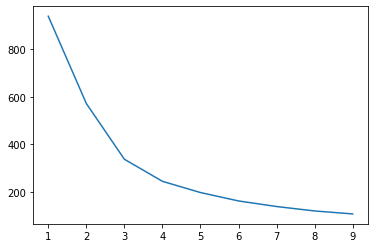

In [65]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
frame=result[["sirkette_calistigi_yil_sayisi","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["sirketten_ayrildi"]].values


cost = []

for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(clusteringx)
  cost.append(model.inertia_)


plt.plot(np.arange(1,10),cost)


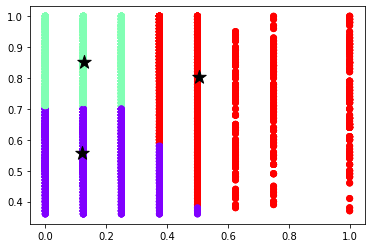

In [69]:
from sklearn.cluster import KMeans
frame=result[["sirkette_calistigi_yil_sayisi","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["sirketten_ayrildi"]].values

km_model=KMeans(n_clusters=3)
km_model.fit(clusteringx)
centers=km_model.cluster_centers_
km_model.labels_

plt.scatter(clusteringx[:,0],clusteringx[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker="*",c='black', s=200)

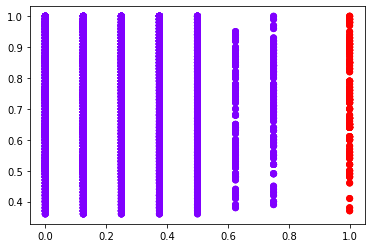

In [70]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
frame=result[["sirkette_calistigi_yil_sayisi","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["sirketten_ayrildi"]].values

aggmodel=AgglomerativeClustering(n_clusters=2,linkage='average')
aggmodel.fit(clusteringx)
plt.scatter(clusteringx[:,0],clusteringx[:,1],c=aggmodel.labels_,cmap='rainbow')

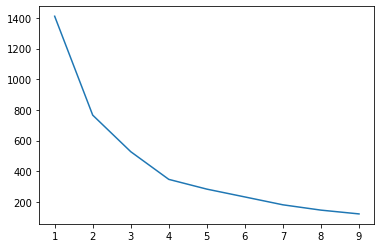

In [71]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
frame=result[["gerceklestirdigi_proje_sayisi","sirkette_calistigi_yil_sayisi"]].values
clusteringx=frame
clusteringy=result[["aylik_ort_calisma_saati"]].values


cost = []

for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(clusteringx)
  cost.append(model.inertia_)


plt.plot(np.arange(1,10),cost)

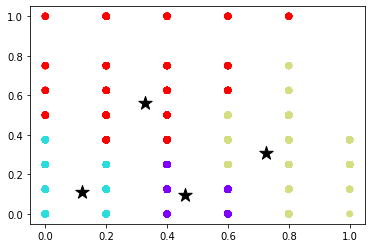

In [72]:
from sklearn.cluster import KMeans
frame=result[["gerceklestirdigi_proje_sayisi","sirkette_calistigi_yil_sayisi"]].values
clusteringx=frame
clusteringy=result[["aylik_ort_calisma_saati"]].values

km_model=KMeans(n_clusters=4)
km_model.fit(clusteringx)
centers=km_model.cluster_centers_
km_model.labels_

plt.scatter(clusteringx[:,0],clusteringx[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker="*",c='black', s=200)

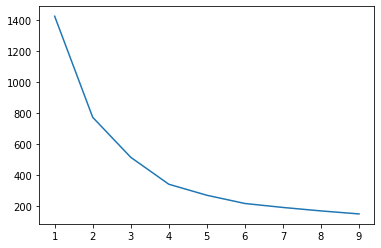

In [80]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
frame=result[["memnuniyet_duzeyi","sirkette_calistigi_yil_sayisi"]].values
clusteringx=frame
clusteringy=result[["maas_derecesi_high"]].values


cost = []

for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(clusteringx)
  cost.append(model.inertia_)


plt.plot(np.arange(1,10),cost)

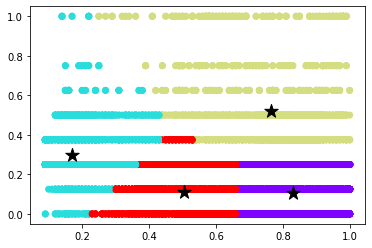

In [75]:
from sklearn.cluster import KMeans
frame=result[["memnuniyet_duzeyi","sirkette_calistigi_yil_sayisi"]].values
clusteringx=frame
clusteringy=result[["maas_derecesi_high"]].values

km_model=KMeans(n_clusters=4)
km_model.fit(clusteringx)
centers=km_model.cluster_centers_
km_model.labels_

plt.scatter(clusteringx[:,0],clusteringx[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker="*",c='black', s=200)

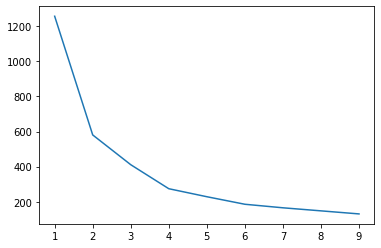

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
frame=result[["aylik_ort_calisma_saati","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["memnuniyet_duzeyi"]].values


cost = []

for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(clusteringx)
  cost.append(model.inertia_)


plt.plot(np.arange(1,10),cost)

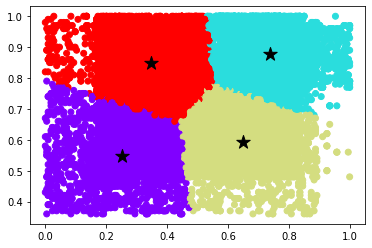

In [79]:
from sklearn.cluster import KMeans
frame=result[["aylik_ort_calisma_saati","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["memnuniyet_duzeyi"]].values


km_model=KMeans(n_clusters=4)
km_model.fit(clusteringx)
centers=km_model.cluster_centers_
km_model.labels_

plt.scatter(clusteringx[:,0],clusteringx[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker="*",c='black', s=200)

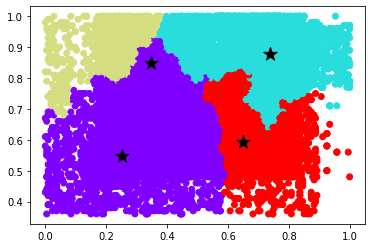

In [87]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
frame=result[["aylik_ort_calisma_saati","aldigi_degerlendirme_puani"]].values
clusteringx=frame
clusteringy=result[["memnuniyet_duzeyi"]].values

aggmodel=AgglomerativeClustering(n_clusters=4,linkage='average')
aggmodel.fit(clusteringx)
plt.scatter(clusteringx[:,0],clusteringx[:,1],c=aggmodel.labels_,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker="*",c='black', s=200)

Bu kümeleme işlemi için Kmeanse en yakın değer linkage='average' parametresi ile bulunmuştur. Kümeleme işlemi tamamen son lab izlenilerek yapılmıştır. Dirsek metodu lab dersinden izlenilerek yazılmıştır.
